In [5]:
from fastf1._api import *




req         WARNING 	DEFAULT CACHE ENABLED! (260.25 MB) C:\Users\asher\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']
core        

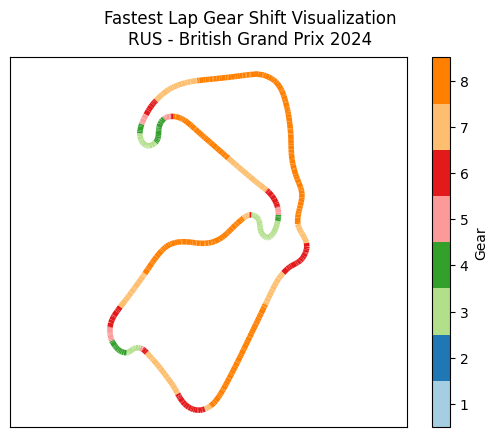

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


session = fastf1.get_session(2024, 'Spanish Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()


x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)


cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)


plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)


cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', '3', '23', '2']


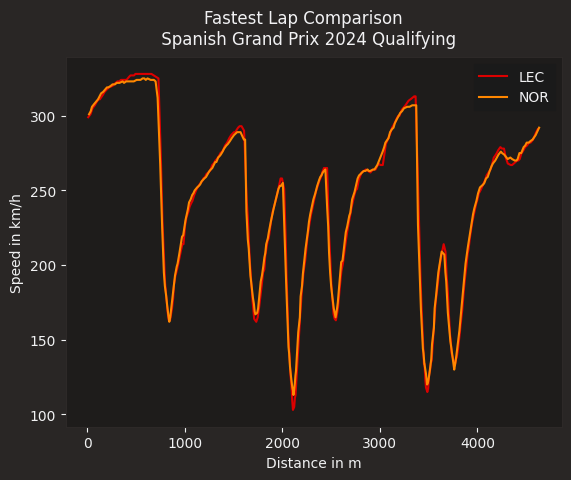

In [7]:
import matplotlib.pyplot as plt

import fastf1.plotting



fastf1.plotting.setup_mpl(misc_mpl_mods=False)


session = fastf1.get_session(2024, 'Spanish Grand Prix', 'Q')
session.load()



ver_lap = session.laps.pick_driver('LEC').pick_fastest()
ham_lap = session.laps.pick_driver('NOR').pick_fastest()



ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()


rbr_color = fastf1.plotting.team_color('FER')
mer_color = fastf1.plotting.team_color('MCL')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='LEC')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='NOR')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()